<a href="https://colab.research.google.com/github/sipocz/Colab/blob/main/Ames_house_pricing_analysis_step_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [667]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import sweetviz as sw

import seaborn as sns

Mounted at /content/drive


In [668]:
!pip install sweetviz

In [669]:
import sweetviz as sw


# **Subrutinok**

In [670]:
def checkvalues(columnname,key):
    print(f"{columnname} ellenőrzése !")
    numok=0
    numerr=0
    for i in df.index:
        if df.at[i,columnname] in key:
            #print(df.at[i,columnname])
            numok+=1
            pass
        else:
            numerr+=1
            print(df.at[i,columnname],end=", ")
    sumall=numok+numerr
    print(f"\n{sumall} mintából {numerr} db nem volt megfelelő")

In [671]:
def createcolumn(columnname,keys):
    for key in keys:
        df[keys[key]]=0.0
    for key in keys:
        for i in df.index:
            if df.at[i,columnname]==key:
                df.at[i,keys[key]]=1.0

# **Adattisztítás**

In [672]:

df=pd.read_csv("/content/drive/My Drive/001_AI/05_AI/hazi/train.csv")
#df.head()

#correlationMAt=df.corr()
#print(correlationMAt)

In [673]:
a=set(df["Neighborhood"])
#print(a)
#df.mean()
salePrice_by_Neighborhood=df.groupby("Neighborhood")[["SalePrice"]].describe()
#print(salePrice_by_Neighborhood)

#print(salePrice_by_Neighborhood[("SalePrice","mean")])
salePrice_by_Neighborhood.columns=salePrice_by_Neighborhood.columns.droplevel(0)
#print(salePrice_by_Neighborhood.columns)
dfs=salePrice_by_Neighborhood["mean"]
#print(dfs)
dfs2=dfs.sort_values(0)
#print(dfs2)
dfs2_enum=dfs2.index
rangsor={i:index for index,i in enumerate(dfs2_enum)}
print(rangsor)

{'MeadowV': 0, 'IDOTRR': 1, 'BrDale': 2, 'BrkSide': 3, 'Edwards': 4, 'OldTown': 5, 'Sawyer': 6, 'Blueste': 7, 'SWISU': 8, 'NPkVill': 9, 'NAmes': 10, 'Mitchel': 11, 'SawyerW': 12, 'NWAmes': 13, 'Gilbert': 14, 'Blmngtn': 15, 'CollgCr': 16, 'Crawfor': 17, 'ClearCr': 18, 'Somerst': 19, 'Veenker': 20, 'Timber': 21, 'StoneBr': 22, 'NridgHt': 23, 'NoRidge': 24}


**És megvan a kerületek rangsora... :-)**

# **Tegyük bele a Dataframe-be **

In [674]:
# Annyi mindent csináltunk, itt újraolvasom...
df=pd.read_csv("/content/drive/My Drive/001_AI/05_AI/hazi/train.csv")
#df.head()

for neigh_name in rangsor:
    df[neigh_name]=0.0
for neigh_name in rangsor:
    print(neigh_name)
    for i in df.index:
        if df.at[i,"Neighborhood"]==neigh_name:
            df.at[i,neigh_name]=1
            
#print(df["Neighborhood"])  kiírjuk, hogy számok lettek -e

MeadowV
IDOTRR
BrDale
BrkSide
Edwards
OldTown
Sawyer
Blueste
SWISU
NPkVill
NAmes
Mitchel
SawyerW
NWAmes
Gilbert
Blmngtn
CollgCr
Crawfor
ClearCr
Somerst
Veenker
Timber
StoneBr
NridgHt
NoRidge


In [675]:
#df.head()

# Adattisztítás: **KitchenQual**


* Ex	Excellent
* Gd	Good
* TA	Typical/Average
* Fa	Fair
* Po	Poor




In [676]:
keys={"Ex":"KitchenQual_Ex", "Gd":"KitchenQual_Gd", "TA":"KitchenQual_Ta","Fa":"KitchenQual_Fa","Po":"KitchenQual_Po"}
idx="KitchenQual"
checkvalues(idx,keys)
#print(df[idx])
createcolumn(idx,keys)

KitchenQual ellenőrzése !

1460 mintából 0 db nem volt megfelelő


# MSZoning: Identifies the general zoning classification of the sale.

        A	Agriculture
        C	Commercial
        FV	Floating Village Residential
        I	Industrial
        RH	Residential High Density
        RL	Residential Low Density
        RP	Residential Low Density Park 
        RM	Residential Medium Density

In [677]:
def create_dict(idx,list):
    o={}
    for i in list:
        o[i]=idx+"_"+i
    return o

In [678]:
t=["A","C (all)","FV","I","RH","RL","RP","RM",]
idx="MSZoning"
keys=create_dict(idx,t)
print(keys)

checkvalues(idx,keys)
#print(df[idx])
createcolumn(idx,keys)

{'A': 'MSZoning_A', 'C (all)': 'MSZoning_C (all)', 'FV': 'MSZoning_FV', 'I': 'MSZoning_I', 'RH': 'MSZoning_RH', 'RL': 'MSZoning_RL', 'RP': 'MSZoning_RP', 'RM': 'MSZoning_RM'}
MSZoning ellenőrzése !

1460 mintából 0 db nem volt megfelelő


# **Street**: Type of road access to property

       Grvl	Gravel	
       Pave	Paved

In [679]:
t=["Grvl","Pave"]
columnname="Street"
key=create_dict(columnname,t)

checkvalues(columnname,key)
createcolumn(columnname,key)

Street ellenőrzése !

1460 mintából 0 db nem volt megfelelő


# **Alley**: Type of alley access to property  **dropped**

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

In [680]:
t=["Grvl", "Pave", "Na"]
columnname="Alley"
key=create_dict(columnname,t)
checkvalues(columnname,key)
#createcolumn(columnname,key)
df.drop(columns=["Alley"], inplace=True)
df.head()

Alley ellenőrzése !
nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MeadowV,IDOTRR,BrDale,BrkSide,Edwards,OldTown,Sawyer,Blueste,SWISU,NPkVill,NAmes,Mitchel,SawyerW,NWAmes,Gilbert,Blmngtn,CollgCr,Crawfor,ClearCr,Somerst,Veenker,Timber,StoneBr,NridgHt,NoRidge,KitchenQual_Ex,KitchenQual_Gd,KitchenQual_Ta,KitchenQual_Fa,KitchenQual_Po,MSZoning_A,MSZoning_C (all),MSZoning_FV,MSZoning_I,MSZoning_RH,MSZoning_RL,MSZoning_RP,MSZoning_RM,Street_Grvl,Street_Pave
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


# LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

In [683]:
t=["Reg","IR1","IR2","IR3"]
columnname="LotShape"
key=create_dict(columnname,t)

checkvalues(columnname,key)
createcolumn(columnname,key)

LotShape ellenőrzése !

1460 mintából 0 db nem volt megfelelő


# LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

In [685]:
t=["Lvl","Bnk","HLS","Low"]
columnname="LandContour"
key=create_dict(columnname,t)

checkvalues(columnname,key)
createcolumn(columnname,key)

LandContour ellenőrzése !

1460 mintából 0 db nem volt megfelelő


# Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only

In [687]:
t=["AllPub","NoSewr","NoSeWa","ELO"]
columnname="Utilities"
key=create_dict(columnname,t)

checkvalues(columnname,key)
createcolumn(columnname,key)

Utilities ellenőrzése !

1460 mintából 0 db nem volt megfelelő


# LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

In [689]:
t=["Inside","Corner","CulDSac","FR2","FR3"]
columnname="LotConfig"
key=create_dict(columnname,t)

checkvalues(columnname,key)
createcolumn(columnname,key)

LotConfig ellenőrzése !

1460 mintából 0 db nem volt megfelelő


# LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

In [691]:
t=["Gtl","Mod","Sev"]
columnname="LandSlope"
key=create_dict(columnname,t)

checkvalues(columnname,key)
createcolumn(columnname,key)

LandSlope ellenőrzése !

1460 mintából 0 db nem volt megfelelő


# Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

In [693]:
t=["Artery","Feedr","Norm","RRNn","RRAn","PosN","PosA","RRNe","RRAe"]
columnname="Condition1"
key=create_dict(columnname,t)

checkvalues(columnname,key)
createcolumn(columnname,key)

Condition1 ellenőrzése !

1460 mintából 0 db nem volt megfelelő


# Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

In [696]:
t=["Artery","Feedr","Norm","RRNn","RRAn","PosN","PosA","RRNe","RRAe"]
columnname="Condition2"
key=create_dict(columnname,t)

checkvalues(columnname,key)
createcolumn(columnname,key)

Condition2 ellenőrzése !

1460 mintából 0 db nem volt megfelelő


In [697]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MeadowV,IDOTRR,BrDale,BrkSide,Edwards,OldTown,Sawyer,Blueste,SWISU,NPkVill,NAmes,Mitchel,SawyerW,NWAmes,Gilbert,Blmngtn,CollgCr,Crawfor,ClearCr,Somerst,Veenker,Timber,StoneBr,NridgHt,NoRidge,KitchenQual_Ex,KitchenQual_Gd,KitchenQual_Ta,KitchenQual_Fa,KitchenQual_Po,MSZoning_A,MSZoning_C (all),MSZoning_FV,MSZoning_I,MSZoning_RH,MSZoning_RL,MSZoning_RP,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_Reg,LotShape_IR1,LotShape_IR2,LotShape_IR3,LandContour_Lvl,LandContour_Bnk,LandContour_HLS,LandContour_Low,Utilities_AllPub,Utilities_NoSewr,Utilities_NoSeWa,Utilities_ELO,LotConfig_Inside,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_RRNn,Condition1_RRAn,Condition1_PosN,Condition1_PosA,Condition1_RRNe,Condition1_RRAe,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_RRNn,Condition2_RRAn,Condition2_PosN,Condition2_PosA,Condition2_RRNe,Condition2_RRAe
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,

# BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

In [704]:
t=["1Fam","2fmCon","Duplex","TwnhsE","Twnhs"]
columnname="BldgType"
key=create_dict(columnname,t)

checkvalues(columnname,key)
createcolumn(columnname,key)

BldgType ellenőrzése !

1460 mintából 0 db nem volt megfelelő


# HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level


---



In [706]:
t=["1Story","1.5Fin","1.5Unf","2Story","2.5Fin","2.5Unf","SFoyer","SLvl"]
columnname="HouseStyle"
key=create_dict(columnname,t)

checkvalues(columnname,key)
createcolumn(columnname,key)

HouseStyle ellenőrzése !

1460 mintából 0 db nem volt megfelelő


# Adattisztítás: **ExterQual**
* Ex Excellent
* Gd Good
* TA Typical/Average
* Fa Fair
* Po Poor

In [614]:



key={"Ex":"ExterQual_Ex", "Gd":"ExterQual_Gd", "TA":"ExterQual_TA","Fa":"ExterQual_Fa","Po":"ExterQual_Po"}
columnname="ExterQual"
checkvalues(columnname,key)

ExterQual ellenőrzése !

1460 mintából 0 db nem volt megfelelő


In [615]:
createcolumn(columnname,key)

# **BsmtQual: Evaluates the height of the basement**

* Ex	Excellent (100+ inches)	
* Gd	Good (90-99 inches)
* TA	Typical (80-89 inches)
* Fa	Fair (70-79 inches)
* Po	Poor (<70 inches
* NA	No Basement

In [616]:
key={"Ex":"BsmtQual_Ex", "Gd":"BsmtQual_Gd", "TA":"BsmtQual_TA","Fa":"BsmtQual_Fa","Po":"BsmtQual_Po","NA":"BsmtQual_NA", np.nan:"BsmtQual_Nan" }
idx="BsmtQual"
checkvalues(idx,key)

BsmtQual ellenőrzése !

1460 mintából 0 db nem volt megfelelő


In [617]:
createcolumn(idx,key)

# Adattisztítás: **FireplaceQu**


* Ex	Excellent
* Gd	Good
* TA	Typical/Average
* Fa	Fair
* Po	Poor
* No Fireplace


In [618]:
key={"Ex":"FireplaceQu_Ex", "Gd":"FireplaceQu_Gd", "TA":"FireplaceQu_TA","Fa":"FireplaceQu_Fa","Po":"FireplaceQu_Po", "No":"FireplaceQu_No", np.nan:"FireplaceQu_Nan"}
idx="FireplaceQu"
checkvalues(idx,key)
createcolumn(idx,key)

FireplaceQu ellenőrzése !

1460 mintából 0 db nem volt megfelelő


# **Foundation: Type of foundation**
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood

In [619]:
key={"BrkTil":"Foundation_BrkTil", "CBlock":"Foundation_CBlock","PConc":"Foundation_PConc","Slab":"Foundation_Slab","Stone":"Foundation_Stone", "Wood":"Foundation_Wood"}
col="Foundation"
checkvalues(col,key)
createcolumn(col,key)

Foundation ellenőrzése !

1460 mintából 0 db nem volt megfelelő


# **GarageQual: Garage quality**

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

In [620]:

key={"Ex":"GarageQual_Ex", "Gd":"GarageQual_Gd", "TA":"GarageQual_TA","Fa":"GarageQual_Fa","Po":"GarageQual_Po","NA":"GarageQual_NA", np.nan:"GarageQual_Nan"}
idx="GarageQual"
checkvalues(idx,key)
createcolumn(idx,key)

GarageQual ellenőrzése !

1460 mintából 0 db nem volt megfelelő


# **GarageFinish: Interior finish of the garage**

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

In [621]:
key={"Fin":"GarageFinish_Fin","RFn":"GarageFinish_RFn","Unf":"GarageFinish_Unf","NA":"GarageFinish_NA",np.nan:"GarageFinish_Nan"}
idx="GarageFinish"
checkvalues(idx,key)
createcolumn(idx,key)

GarageFinish ellenőrzése !

1460 mintából 0 db nem volt megfelelő


# **BsmtCond**: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

In [622]:
key={"Ex":"BsmtCond_Ex","Gd":"BsmtCond_Gd","TA":"BsmtCond_TA","Fa":"BsmtCond_Fa" ,"Po":"BsmtCond_Po",np.nan:"BsmtCond_NA"}
idx="BsmtCond"
checkvalues(idx,key)
createcolumn(idx,key)

BsmtCond ellenőrzése !

1460 mintából 0 db nem volt megfelelő


# **ExterCond**: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		

In [623]:
key={"Ex":"ExterCond_Ex","Gd":"ExterCond_Gd","TA":"ExterCond_TA","Fa":"ExterCond_FA" ,"Po":"ExterCond_Po"}
idx="ExterCond"
checkvalues(idx,key)
createcolumn(idx,key)

ExterCond ellenőrzése !

1460 mintából 0 db nem volt megfelelő


# **Heating**: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace

In [624]:
key={"Floor":"Heating_Floor","GasA":"Heating_GasA","GasW":"Heating_GasW","Grav":"Heating_Grav" ,"OthW":"Heating_OthW","Wall":"Heating_Wall"}
idx="Heating"
checkvalues(idx,key)
createcolumn(idx,key)

Heating ellenőrzése !

1460 mintából 0 db nem volt megfelelő


# **HeatingQC**: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

In [625]:
key={"Ex":"HeatingQC_Ex","Gd":"HeatingQC_Gd","TA":"HeatingQC_TA","Fa":"HeatingQC_FA" ,"Po":"HeatingQC_Po"}
idx="HeatingQC"
checkvalues(idx,key)
createcolumn(idx,key)

HeatingQC ellenőrzése !

1460 mintából 0 db nem volt megfelelő


# **CentralAir**: Central air conditioning

       N	No
       Y	Yes

In [626]:
key={"N":"CentralAir_N","Y":"CentralAir_Y"}
idx="CentralAir"
checkvalues(idx,key)
createcolumn(idx,key)

CentralAir ellenőrzése !

1460 mintából 0 db nem volt megfelelő



# **Functional**: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		

In [627]:
key={"Typ":"Functional_Typ","Min1":"Functional_Min1","Min2":"Functional_Min2","Mod":"Functional_Mod" ,"Maj1":"Functional_Maj1","Maj2":"Functional_Maj2","Sev":"Functional_Sev","Sal":"Functional_Sal"}
idx="Functional"
checkvalues(idx,key)
createcolumn(idx,key)

Functional ellenőrzése !

1460 mintából 0 db nem volt megfelelő


GarageYrBlt: Year garage was built

In [628]:
for i in df.index:
    if pd.isna(df.loc[i,'GarageYrBlt']):
        print("NANAN")
        df.loc[i,"GarageYrBlt"]=1111
    else:
        print(f"<{i},{df.loc[i,'GarageYrBlt']} ,{df.loc[i,'GarageType']}>" ,end=", ")

<0,2003.0 ,Attchd>, <1,1976.0 ,Attchd>, <2,2001.0 ,Attchd>, <3,1998.0 ,Detchd>, <4,2000.0 ,Attchd>, <5,1993.0 ,Attchd>, <6,2004.0 ,Attchd>, <7,1973.0 ,Attchd>, <8,1931.0 ,Detchd>, <9,1939.0 ,Attchd>, <10,1965.0 ,Detchd>, <11,2005.0 ,BuiltIn>, <12,1962.0 ,Detchd>, <13,2006.0 ,Attchd>, <14,1960.0 ,Attchd>, <15,1991.0 ,Detchd>, <16,1970.0 ,Attchd>, <17,1967.0 ,CarPort>, <18,2004.0 ,Detchd>, <19,1958.0 ,Attchd>, <20,2005.0 ,BuiltIn>, <21,1930.0 ,Attchd>, <22,2002.0 ,Attchd>, <23,1976.0 ,Attchd>, <24,1968.0 ,Attchd>, <25,2007.0 ,Attchd>, <26,2005.0 ,Detchd>, <27,2008.0 ,Attchd>, <28,1957.0 ,Attchd>, <29,1920.0 ,Detchd>, <30,1920.0 ,Detchd>, <31,1966.0 ,Attchd>, <32,2007.0 ,Attchd>, <33,1959.0 ,Attchd>, <34,2005.0 ,Attchd>, <35,2004.0 ,BuiltIn>, <36,1995.0 ,Attchd>, <37,1954.0 ,Attchd>, <38,1953.0 ,Detchd>, NANAN
<40,1965.0 ,Attchd>, <41,1959.0 ,Attchd>, <42,1983.0 ,Attchd>, <43,1977.0 ,Detchd>, <44,1959.0 ,Attchd>, <45,2005.0 ,Attchd>, <46,2003.0 ,Attchd>, <47,2006.0 ,Attchd>, NANAN
<49,196

# **Visszateszt**

In [629]:
for i in df.index:
    if pd.isna(df.loc[i,'GarageYrBlt']):
        print("NANAN")
        df.loc[i,"GarageYrBlt"]=1111
    else:
        print(f"<{i},{df.loc[i,'GarageYrBlt']} ,{df.loc[i,'GarageType']}>" ,end=", ")

<0,2003.0 ,Attchd>, <1,1976.0 ,Attchd>, <2,2001.0 ,Attchd>, <3,1998.0 ,Detchd>, <4,2000.0 ,Attchd>, <5,1993.0 ,Attchd>, <6,2004.0 ,Attchd>, <7,1973.0 ,Attchd>, <8,1931.0 ,Detchd>, <9,1939.0 ,Attchd>, <10,1965.0 ,Detchd>, <11,2005.0 ,BuiltIn>, <12,1962.0 ,Detchd>, <13,2006.0 ,Attchd>, <14,1960.0 ,Attchd>, <15,1991.0 ,Detchd>, <16,1970.0 ,Attchd>, <17,1967.0 ,CarPort>, <18,2004.0 ,Detchd>, <19,1958.0 ,Attchd>, <20,2005.0 ,BuiltIn>, <21,1930.0 ,Attchd>, <22,2002.0 ,Attchd>, <23,1976.0 ,Attchd>, <24,1968.0 ,Attchd>, <25,2007.0 ,Attchd>, <26,2005.0 ,Detchd>, <27,2008.0 ,Attchd>, <28,1957.0 ,Attchd>, <29,1920.0 ,Detchd>, <30,1920.0 ,Detchd>, <31,1966.0 ,Attchd>, <32,2007.0 ,Attchd>, <33,1959.0 ,Attchd>, <34,2005.0 ,Attchd>, <35,2004.0 ,BuiltIn>, <36,1995.0 ,Attchd>, <37,1954.0 ,Attchd>, <38,1953.0 ,Detchd>, <39,1111.0 ,nan>, <40,1965.0 ,Attchd>, <41,1959.0 ,Attchd>, <42,1983.0 ,Attchd>, <43,1977.0 ,Detchd>, <44,1959.0 ,Attchd>, <45,2005.0 ,Attchd>, <46,2003.0 ,Attchd>, <47,2006.0 ,Attchd>, <

# **MasVnrArea: Masonry veneer area in square feet**

In [630]:
# Van néhány NaN ebben a kategóriában. 0-val helyettesítem, majd meglátjuk.
# Lehet van korreláció ez és valami más között, ha igen meg lehetne predikálni


code="MasVnrArea"
for i in df.index:
    if pd.isna(df.loc[i,code]):
        print(f"<{i},{df.loc[i,code]}>" ,end=", ")
        df.loc[i,code]=df.loc[i,"LotArea"]**0.5
    else:
        pass
        #print(f"<{i},{df.loc[i,code]}>" ,end=", ")

<234,nan>, <529,nan>, <650,nan>, <936,nan>, <973,nan>, <977,nan>, <1243,nan>, <1278,nan>, 

# LotFrontage: Linear feet of street connected to **property**

In [631]:
# Van néhány NaN ebben a kategóriában is. sqrt-val helyettesítem, majd meglátjuk.
# Lehet van korreláció ez és valami más között, ha igen meg lehetne predikálni


code="LotFrontage"
for i in df.index:
    if pd.isna(df.loc[i,code]):
        print(f"<{i},{df.loc[i,code]}>" ,end=", ")
        df.loc[i,code]=100
    else:
        pass
        #print(f"<{i},{df.loc[i,code]}>" ,end=", ")

<7,nan>, <12,nan>, <14,nan>, <16,nan>, <24,nan>, <31,nan>, <42,nan>, <43,nan>, <50,nan>, <64,nan>, <66,nan>, <76,nan>, <84,nan>, <95,nan>, <100,nan>, <104,nan>, <111,nan>, <113,nan>, <116,nan>, <120,nan>, <126,nan>, <131,nan>, <133,nan>, <136,nan>, <147,nan>, <149,nan>, <152,nan>, <153,nan>, <160,nan>, <166,nan>, <169,nan>, <170,nan>, <177,nan>, <180,nan>, <186,nan>, <191,nan>, <203,nan>, <207,nan>, <208,nan>, <214,nan>, <218,nan>, <221,nan>, <234,nan>, <237,nan>, <244,nan>, <249,nan>, <269,nan>, <287,nan>, <288,nan>, <293,nan>, <307,nan>, <308,nan>, <310,nan>, <319,nan>, <328,nan>, <330,nan>, <335,nan>, <342,nan>, <346,nan>, <347,nan>, <351,nan>, <356,nan>, <360,nan>, <361,nan>, <364,nan>, <366,nan>, <369,nan>, <370,nan>, <375,nan>, <384,nan>, <392,nan>, <393,nan>, <404,nan>, <405,nan>, <412,nan>, <421,nan>, <426,nan>, <447,nan>, <452,nan>, <457,nan>, <458,nan>, <459,nan>, <465,nan>, <470,nan>, <484,nan>, <490,nan>, <496,nan>, <516,nan>, <518,nan>, <529,nan>, <537,nan>, <538,nan>, <53

# **SaleCondition: Condition of sale**

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

In [632]:

for j,i in enumerate(df.columns):
    print(j, i)
pos=78
countNorm=0
countAbnorm=0
code="SaleCondition"
for i in df.index:
    if df.loc[i,code]=="Normal":
        print(f"<{i},{df.loc[i,code]}>" ,end=", ")
        if countNorm%20==0:
            print("")
        countNorm+=1
    else:
        pass
        countAbnorm+=1
        print(f"<{i},{df.loc[i,code]}>" ,end=", ")
        df.drop(labels=i, inplace=True)
print(f"\nAbnormál: {countAbnorm}, Normál: {countNorm}")

#df.dropna(inplace=True)

0 Id
1 MSSubClass
2 MSZoning
3 LotFrontage
4 LotArea
5 Street
6 LotShape
7 LandContour
8 Utilities
9 LotConfig
10 LandSlope
11 Neighborhood
12 Condition1
13 Condition2
14 BldgType
15 HouseStyle
16 OverallQual
17 OverallCond
18 YearBuilt
19 YearRemodAdd
20 RoofStyle
21 RoofMatl
22 Exterior1st
23 Exterior2nd
24 MasVnrType
25 MasVnrArea
26 ExterQual
27 ExterCond
28 Foundation
29 BsmtQual
30 BsmtCond
31 BsmtExposure
32 BsmtFinType1
33 BsmtFinSF1
34 BsmtFinType2
35 BsmtFinSF2
36 BsmtUnfSF
37 TotalBsmtSF
38 Heating
39 HeatingQC
40 CentralAir
41 Electrical
42 1stFlrSF
43 2ndFlrSF
44 LowQualFinSF
45 GrLivArea
46 BsmtFullBath
47 BsmtHalfBath
48 FullBath
49 HalfBath
50 BedroomAbvGr
51 KitchenAbvGr
52 KitchenQual
53 TotRmsAbvGrd
54 Functional
55 Fireplaces
56 FireplaceQu
57 GarageType
58 GarageYrBlt
59 GarageFinish
60 GarageCars
61 GarageArea
62 GarageQual
63 GarageCond
64 PavedDrive
65 WoodDeckSF
66 OpenPorchSF
67 EnclosedPorch
68 3SsnPorch
69 ScreenPorch
70 PoolArea
71 PoolQC
72 Fence
73 MiscFe

In [633]:
df1 = df[df.isna().any(axis=1)]
df2=df.count()
df1.head()
#print(df.isna())
print (df.isna().any(axis=0))

Id                   False
MSSubClass           False
MSZoning             False
LotFrontage          False
LotArea              False
Street               False
LotShape             False
LandContour          False
Utilities            False
LotConfig            False
LandSlope            False
Neighborhood         False
Condition1           False
Condition2           False
BldgType             False
HouseStyle           False
OverallQual          False
OverallCond          False
YearBuilt            False
YearRemodAdd         False
RoofStyle            False
RoofMatl             False
Exterior1st          False
Exterior2nd          False
MasVnrType            True
MasVnrArea           False
ExterQual            False
ExterCond            False
Foundation           False
BsmtQual              True
BsmtCond              True
BsmtExposure          True
BsmtFinType1          True
BsmtFinSF1           False
BsmtFinType2          True
BsmtFinSF2           False
BsmtUnfSF            False
T

In [634]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

# Checking NaN columns BEFORE Cleaning
print('Total Rows- BEFORE Cleaning: ', df.shape[0])
print('Total Columns- BEFORE Cleaning: ', df.shape[1], '\n')
nans = df.isnull().sum()
nans = nans[nans!=0]
print('Total NaN values - BEFORE Cleaning:\n',nans)

Total Rows- BEFORE Cleaning:  1198
Total Columns- BEFORE Cleaning:  189 

Total NaN values - BEFORE Cleaning:
 MasVnrType         4
BsmtQual          32
BsmtCond          32
BsmtExposure      33
BsmtFinType1      32
BsmtFinType2      33
Electrical         1
FireplaceQu      563
GarageType        61
GarageFinish      61
GarageQual        61
GarageCond        61
PoolQC          1195
Fence            957
MiscFeature     1148
dtype: int64


In [635]:
#@title Független változók száma { form-width: "50%", display-mode: "form" }
ndb =  40#@param {type:"integer"}


<Figure size 1440x1440 with 0 Axes>

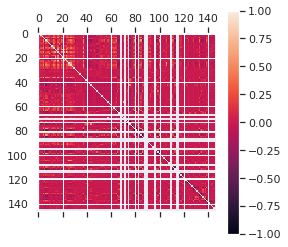

In [636]:
#ndb=110
correlacio=df.corr()
#print(correlacio)
plt.figure(figsize=(20,20))

plt.matshow(correlacio)
plt.colorbar()
plt.show()
cordl=correlacio.nlargest(ndb,"SalePrice")
cords=correlacio.nsmallest(ndb,"SalePrice")



# MasVnrArea: Masonry veneer area in square  feet

In [637]:
# csináljuk egy lineáris korrelációt, hátha ki tudjuk találni a hiányzó értékeket
cormasonryL=correlacio.nlargest(ndb,"MasVnrArea")
cormasonryS=correlacio.nsmallest(ndb,"MasVnrArea")
mascorridx=40
cormasonryX1=cormasonryL["MasVnrArea"][1:mascorridx]
cormasonryX2=cormasonryS["MasVnrArea"][1:mascorridx]
l1=list(cormasonryX1.index)
l2=list(cormasonryX2.index)
maslist=l1+l2
#print(maslist)

masX_df=df[maslist]
masX_df.describe()
masY_df=df["MasVnrArea"]
masY_df.describe()

from sklearn import datasets, linear_model

alpha=0.0001

from sklearn.linear_model import Lasso
alpha=0.001
lassoregMAS = Lasso(alpha=alpha,normalize=True, max_iter=1e6)
lassoregMAS.fit(masX_df,masY_df)
lassopredMAS = lassoregMAS.predict(masX_df)

lregMAS = linear_model.Ridge()  
lregMAS.fit(masX_df,masY_df)
lreg_predMAS = lregMAS.predict(masX_df)
print(maslist)

['SalePrice', 'OverallQual', 'GrLivArea', 'NoRidge', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', '1stFlrSF', 'FullBath', 'BsmtQual_Ex', 'TotRmsAbvGrd', 'BsmtFinSF1', 'ExterQual_Ex', 'Fireplaces', 'NridgHt', 'HalfBath', '2ndFlrSF', 'KitchenQual_Ex', 'ExterQual_Gd', 'Foundation_PConc', 'WoodDeckSF', 'GarageFinish_Fin', 'GarageQual_TA', 'FireplaceQu_TA', 'FireplaceQu_Ex', 'HeatingQC_Ex', 'GarageYrBlt', 'GarageFinish_RFn', 'LotFrontage', 'YearRemodAdd', 'BrDale', 'BedroomAbvGr', 'CentralAir_Y', 'KitchenQual_Gd', 'NWAmes', 'Somerst', 'OpenPorchSF', 'BsmtQual_Gd', 'GarageFinish_Unf', 'Foundation_BrkTil', 'BsmtQual_TA', 'KitchenQual_Ta', 'OldTown', 'OverallCond', 'MSZoning_RM', 'CentralAir_N', 'BrkSide', 'EnclosedPorch', 'Edwards', 'GarageQual_Fa', 'Sawyer', 'KitchenQual_Fa', 'HeatingQC_TA', 'BsmtQual_Fa', 'Gilbert', 'IDOTRR', 'Functional_Min2', 'HeatingQC_Gd', 'BsmtCond_Fa', 'BsmtFinSF2', 'SWISU', 'LowQualFinSF', 'MeadowV', 'ExterQual_Fa', 'Heating_GasW', 'HeatingQC_FA', 'NPkVill

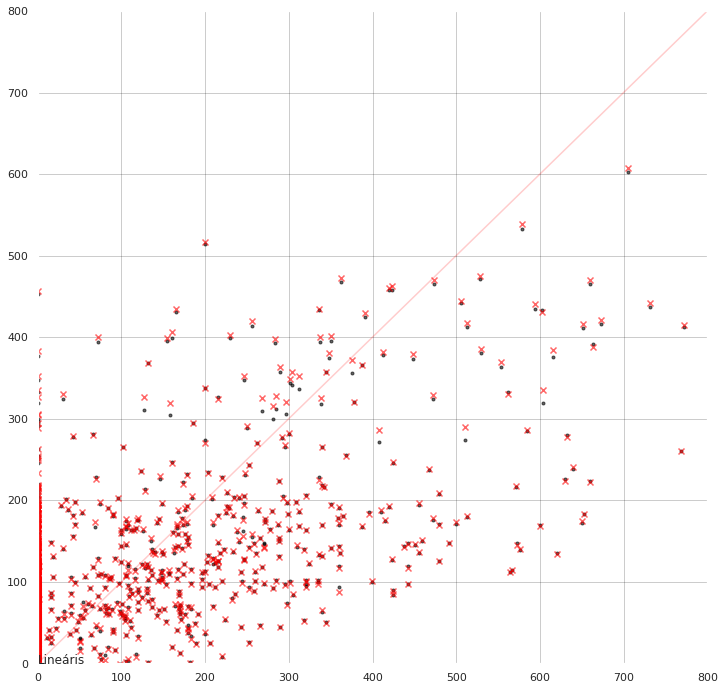

In [638]:

plt.figure(figsize=(12,12))
plt.subplot(111, facecolor="white",)
plt.grid(color="black", alpha=0.2)
plt.plot([0,600000],[0,600000],c="red", alpha=0.2)

plt.scatter(masY_df,lreg_predMAS,c="black",alpha=0.6,marker=".",)
plt.scatter(masY_df,lassopredMAS,c="red",alpha=0.6,marker="x",)


#plt.scatter(masY_df,masX_df,c="red",alpha=0.3,marker="X")

plt.text(0,0,"Lineáris")
plt.xlim(0,800)
plt.ylim(0,800)


plt.show()

# Ez nem jött be! Nem látszik az összefüggés!


---




Innen viszza a fővonalra
---



In [639]:
l1=list(cordl["SalePrice"].index)
print(l1)


['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', '1stFlrSF', 'GarageArea', 'FullBath', 'TotRmsAbvGrd', 'ExterQual_Gd', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 'Foundation_PConc', 'MasVnrArea', 'KitchenQual_Ex', 'BsmtQual_Ex', 'HeatingQC_Ex', 'BsmtFinSF1', 'NoRidge', 'GarageFinish_Fin', 'KitchenQual_Gd', 'ExterQual_Ex', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF', 'BsmtQual_Gd', 'NridgHt', 'HalfBath', 'LotFrontage', 'GarageYrBlt', 'LotArea', 'FireplaceQu_Gd', 'MSZoning_RL', 'CentralAir_Y', 'FireplaceQu_Ex', 'GarageQual_TA', 'FireplaceQu_TA', 'BsmtFullBath', 'BedroomAbvGr']


In [640]:
l2=list(cords["SalePrice"].index)
nlarge=list((l1+l2[1:]))

print(nlarge)
print(len(nlarge))


for i in df.columns:
    if i not in nlarge:
        df.drop(columns=[i], inplace=True)


df.head()

['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', '1stFlrSF', 'GarageArea', 'FullBath', 'TotRmsAbvGrd', 'ExterQual_Gd', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 'Foundation_PConc', 'MasVnrArea', 'KitchenQual_Ex', 'BsmtQual_Ex', 'HeatingQC_Ex', 'BsmtFinSF1', 'NoRidge', 'GarageFinish_Fin', 'KitchenQual_Gd', 'ExterQual_Ex', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF', 'BsmtQual_Gd', 'NridgHt', 'HalfBath', 'LotFrontage', 'GarageYrBlt', 'LotArea', 'FireplaceQu_Gd', 'MSZoning_RL', 'CentralAir_Y', 'FireplaceQu_Ex', 'GarageQual_TA', 'FireplaceQu_TA', 'BsmtFullBath', 'BedroomAbvGr', 'KitchenQual_Ta', 'BsmtQual_TA', 'GarageFinish_Unf', 'Foundation_CBlock', 'MSZoning_RM', 'HeatingQC_TA', 'CentralAir_N', 'Foundation_BrkTil', 'Edwards', 'NAmes', 'OldTown', 'KitchenQual_Fa', 'BrkSide', 'IDOTRR', 'KitchenAbvGr', 'BsmtCond_Fa', 'ExterCond_FA', 'Foundation_Slab', 'Sawyer', 'HeatingQC_FA', 'ExterQual_Fa', 'HeatingQC_Gd', 'GarageQual_Fa', 'MeadowV', 'BsmtQual_Fa', 'EnclosedPorch', 'BrD

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,SalePrice,MeadowV,IDOTRR,BrDale,BrkSide,Edwards,OldTown,Sawyer,SWISU,NAmes,Mitchel,NridgHt,NoRidge,KitchenQual_Ex,KitchenQual_Gd,KitchenQual_Ta,KitchenQual_Fa,MSZoning_C (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,ExterQual_Ex,ExterQual_Gd,ExterQual_Fa,BsmtQual_Ex,BsmtQual_Gd,BsmtQual_TA,BsmtQual_Fa,FireplaceQu_Ex,FireplaceQu_Gd,FireplaceQu_TA,FireplaceQu_Po,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,GarageQual_TA,GarageQual_Fa,GarageFinish_Fin,GarageFinish_Unf,BsmtCond_Fa,ExterCond_FA,Heating_Grav,Heating_Wall,HeatingQC_Ex,HeatingQC_Gd,HeatingQC_TA,HeatingQC_FA,CentralAir_N,CentralAir_Y,Functional_Min1,Functional_Min2,Functional_Maj2
0,60,65.0,8450,7,5,2003,2003,196.0,706,856,856,854,1710,1,2,1,3,1,8,0,2003.0,2,548,0,61,0,208500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,20,80.0,9600,6,8,1976,1976,0.0,978,1262,1262,0,1262,0,2,0,3,1,6,1,1976.0,2,460,298,0,0,181500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,60,68.0,11250,7,5,2001,2002,162.0,486,920,920,866,1786,1,2,1,3,1,6,1,2001.0,2,608,0,42,0,223500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,60,84.0,14260,8,5,2000,2000,350.0,655,1145,1145,1053,2198,1,2,1,4,1,9,1,2000.0,3,836,192,84,0,250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,50,85.0,14115,5,5,1993,1995,0.0,732,796,796,566,1362,1,1,1,1,1,5,0,1993.0,2,480,40,30,0,143000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [641]:
# Checking NaN columns BEFORE Cleaning
print('Total Rows- BEFORE Cleaning: ', df.shape[0])
print('Total Columns- BEFORE Cleaning: ', df.shape[1], '\n')
nans = df.isnull().sum()
nans = nans[nans!=0]
print('Total NaN values - BEFORE Cleaning:\n',nans)

Total Rows- BEFORE Cleaning:  1198
Total Columns- BEFORE Cleaning:  79 

Total NaN values - BEFORE Cleaning:
 Series([], dtype: int64)


In [642]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
print(df)

      MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60         65.0     8450            7            5       2003   
1             20         80.0     9600            6            8       1976   
2             60         68.0    11250            7            5       2001   
4             60         84.0    14260            8            5       2000   
5             50         85.0    14115            5            5       1993   
...          ...          ...      ...          ...          ...        ...   
1455          60         62.0     7917            6            5       1999   
1456          20         85.0    13175            6            6       1978   
1457          70         66.0     9042            7            9       1941   
1458          20         68.0     9717            5            6       1950   
1459          20         75.0     9937            5            6       1965   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  TotalBs

In [643]:
df_minimal=df[nlarge]

#df=(df_minimal-df_minimal.min())/(df_minimal.max()-df_minimal.min())

df.replace(-np.inf,np.nan)
df.replace(np.inf,np.nan)
df.dropna()


X=df[nlarge[1:]]
#X=X.values.astype(np.float)
print(X.columns)
print(type(X))
Y=df[nlarge[0:1]]

print(Y.columns)
print(type(Y))



Index(['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', '1stFlrSF',
       'GarageArea', 'FullBath', 'TotRmsAbvGrd', 'ExterQual_Gd', 'YearBuilt',
       'YearRemodAdd', 'Fireplaces', 'Foundation_PConc', 'MasVnrArea',
       'KitchenQual_Ex', 'BsmtQual_Ex', 'HeatingQC_Ex', 'BsmtFinSF1',
       'NoRidge', 'GarageFinish_Fin', 'KitchenQual_Gd', 'ExterQual_Ex',
       '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF', 'BsmtQual_Gd', 'NridgHt',
       'HalfBath', 'LotFrontage', 'GarageYrBlt', 'LotArea', 'FireplaceQu_Gd',
       'MSZoning_RL', 'CentralAir_Y', 'FireplaceQu_Ex', 'GarageQual_TA',
       'FireplaceQu_TA', 'BsmtFullBath', 'BedroomAbvGr', 'KitchenQual_Ta',
       'BsmtQual_TA', 'GarageFinish_Unf', 'Foundation_CBlock', 'MSZoning_RM',
       'HeatingQC_TA', 'CentralAir_N', 'Foundation_BrkTil', 'Edwards', 'NAmes',
       'OldTown', 'KitchenQual_Fa', 'BrkSide', 'IDOTRR', 'KitchenAbvGr',
       'BsmtCond_Fa', 'ExterCond_FA', 'Foundation_Slab', 'Sawyer',
       'HeatingQC_FA', 'ExterQual_F

In [644]:
len(df.columns)
 

79

In [645]:
print(type(df))
print(nlarge)

df["SalePrice"]
df.columns

<class 'pandas.core.frame.DataFrame'>
['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', '1stFlrSF', 'GarageArea', 'FullBath', 'TotRmsAbvGrd', 'ExterQual_Gd', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 'Foundation_PConc', 'MasVnrArea', 'KitchenQual_Ex', 'BsmtQual_Ex', 'HeatingQC_Ex', 'BsmtFinSF1', 'NoRidge', 'GarageFinish_Fin', 'KitchenQual_Gd', 'ExterQual_Ex', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF', 'BsmtQual_Gd', 'NridgHt', 'HalfBath', 'LotFrontage', 'GarageYrBlt', 'LotArea', 'FireplaceQu_Gd', 'MSZoning_RL', 'CentralAir_Y', 'FireplaceQu_Ex', 'GarageQual_TA', 'FireplaceQu_TA', 'BsmtFullBath', 'BedroomAbvGr', 'KitchenQual_Ta', 'BsmtQual_TA', 'GarageFinish_Unf', 'Foundation_CBlock', 'MSZoning_RM', 'HeatingQC_TA', 'CentralAir_N', 'Foundation_BrkTil', 'Edwards', 'NAmes', 'OldTown', 'KitchenQual_Fa', 'BrkSide', 'IDOTRR', 'KitchenAbvGr', 'BsmtCond_Fa', 'ExterCond_FA', 'Foundation_Slab', 'Sawyer', 'HeatingQC_FA', 'ExterQual_Fa', 'HeatingQC_Gd', 'GarageQual_Fa', 'MeadowV'

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'SalePrice', 'MeadowV', 'IDOTRR',
       'BrDale', 'BrkSide', 'Edwards', 'OldTown', 'Sawyer', 'SWISU', 'NAmes',
       'Mitchel', 'NridgHt', 'NoRidge', 'KitchenQual_Ex', 'KitchenQual_Gd',
       'KitchenQual_Ta', 'KitchenQual_Fa', 'MSZoning_C (all)', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'ExterQual_Ex', 'ExterQual_Gd',
       'ExterQual_Fa', 'BsmtQual_Ex', 'BsmtQual_Gd', 'BsmtQual_TA',
       'BsmtQual_Fa', 'FireplaceQu_Ex', 'FireplaceQu_Gd', 'FireplaceQu_TA',
       'FireplaceQu_Po', 'Foundation_BrkTil', 'Foundation_CBlock',
       'Foundation_PConc', 'Foundation_Sla

In [646]:
print(df)

sns.set()
print(df.head())
#sns.pairplot(df[nlarge[0:15]])
#plt.show()
Y

      MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60         65.0     8450            7            5       2003   
1             20         80.0     9600            6            8       1976   
2             60         68.0    11250            7            5       2001   
4             60         84.0    14260            8            5       2000   
5             50         85.0    14115            5            5       1993   
...          ...          ...      ...          ...          ...        ...   
1455          60         62.0     7917            6            5       1999   
1456          20         85.0    13175            6            6       1978   
1457          70         66.0     9042            7            9       1941   
1458          20         68.0     9717            5            6       1950   
1459          20         75.0     9937            5            6       1965   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  TotalBs

,SalePrice
0,208500
1,181500
2,223500
4,250000
5,143000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [647]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

# Checking NaN columns BEFORE Cleaning
print('Total Rows- BEFORE Cleaning: ', df.shape[0])
print('Total Columns- BEFORE Cleaning: ', df.shape[1], '\n')
nans = df.isnull().sum()
nans = nans[nans!=0]
print('Total NaN values - BEFORE Cleaning:\n',nans)

Total Rows- BEFORE Cleaning:  1198
Total Columns- BEFORE Cleaning:  79 

Total NaN values - BEFORE Cleaning:
 Series([], dtype: int64)


In [648]:
from sklearn import datasets, linear_model

print(df.describe())

alpha=0.0001


print(X)
print(Y)
for i in nlarge[0:0]:
    print(i,Y[i].sum())
print(df[["SalePrice"]])




lreg = linear_model.Ridge()  
lreg.fit(X,Y)
lreg_pred = lreg.predict(X)

        MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1198.000000  1198.000000    1198.000000  1198.000000  1198.000000   
mean     57.378965    75.232888   10543.478297     6.006678     5.659432   
std      42.495957    23.988336   10681.016803     1.318193     1.139790   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7544.500000     5.000000     5.000000   
50%      50.000000    75.000000    9468.500000     6.000000     5.000000   
75%      70.000000   100.000000   11451.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  TotalBsmtSF  \
count  1198.000000   1198.000000  1198.000000  1198.000000  1198.000000   
mean   1969.030885   1983.702003    96.542144   439.469115  1024.569282   
std      29.493948     20.277577   175.672502   407.738366   401.579758   
min    1872.000

In [649]:
Y.describe()

,SalePrice
count,1198.000000
mean,175202.219533
std,69713.636280
min,39300.000000
25%,130000.000000
50%,160000.000000
75%,205000.000000
max,755000.000000


1198
count    1198.000000
mean       -0.517441
std        11.089176
min       -86.602753
25%        -6.316368
50%        -0.003528
75%         5.840955
max        63.979408
dtype: float64


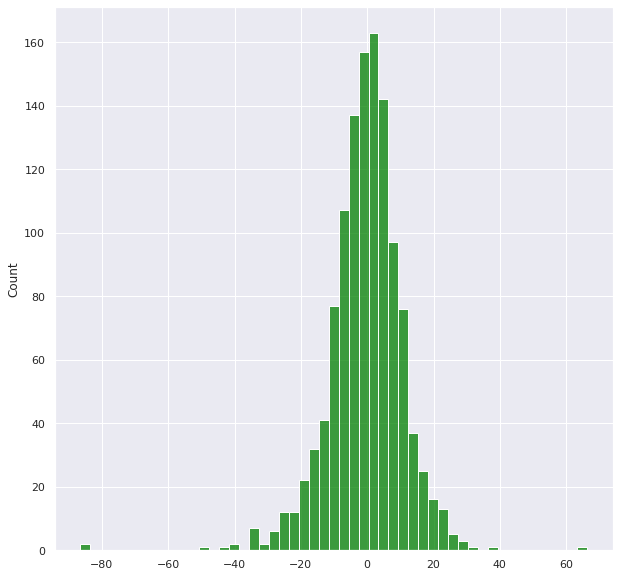

In [650]:
delta_list=[]
import seaborn as sns
h=len(df["SalePrice"])
print(h)
sns.set()
for i in range(h):
    #print(i)
    
    deltapercent=(Y.iloc[i,0]-lreg_pred[i])/Y.iloc[i,0]*100
    #print(f"{i} --{deltapercent}")
    delta_list.append(deltapercent[0])
       

plt.figure(figsize=(10,10))
sns.histplot(delta_list,color="green", binwidth=3,);

a=pd.Series(delta_list)
#print(endofparam,a.describe())
print(a.describe())

# **Ez eddig elég meggyőző! Lehet még rajta javítani?**

# **Outlier keresés**

In [651]:
#Outlier keresés
# hol is tatunk most az eredeti esetszámhoz képest?
print(f"Az aktuális esetszám: {max(df.index)}")
df.head()

Az aktuális esetszám: 1459


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,SalePrice,MeadowV,IDOTRR,BrDale,BrkSide,Edwards,OldTown,Sawyer,SWISU,NAmes,Mitchel,NridgHt,NoRidge,KitchenQual_Ex,KitchenQual_Gd,KitchenQual_Ta,KitchenQual_Fa,MSZoning_C (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,ExterQual_Ex,ExterQual_Gd,ExterQual_Fa,BsmtQual_Ex,BsmtQual_Gd,BsmtQual_TA,BsmtQual_Fa,FireplaceQu_Ex,FireplaceQu_Gd,FireplaceQu_TA,FireplaceQu_Po,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,GarageQual_TA,GarageQual_Fa,GarageFinish_Fin,GarageFinish_Unf,BsmtCond_Fa,ExterCond_FA,Heating_Grav,Heating_Wall,HeatingQC_Ex,HeatingQC_Gd,HeatingQC_TA,HeatingQC_FA,CentralAir_N,CentralAir_Y,Functional_Min1,Functional_Min2,Functional_Maj2
0,60,65.0,8450,7,5,2003,2003,196.0,706,856,856,854,1710,1,2,1,3,1,8,0,2003.0,2,548,0,61,0,208500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,20,80.0,9600,6,8,1976,1976,0.0,978,1262,1262,0,1262,0,2,0,3,1,6,1,1976.0,2,460,298,0,0,181500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,60,68.0,11250,7,5,2001,2002,162.0,486,920,920,866,1786,1,2,1,3,1,6,1,2001.0,2,608,0,42,0,223500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,60,84.0,14260,8,5,2000,2000,350.0,655,1145,1145,1053,2198,1,2,1,4,1,9,1,2000.0,3,836,192,84,0,250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,50,85.0,14115,5,5,1993,1995,0.0,732,796,796,566,1362,1,1,1,1,1,5,0,1993.0,2,480,40,30,0,143000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Ransac regresszió számol outliereket is!
# Nézzük mire megyünk vele!!

1198


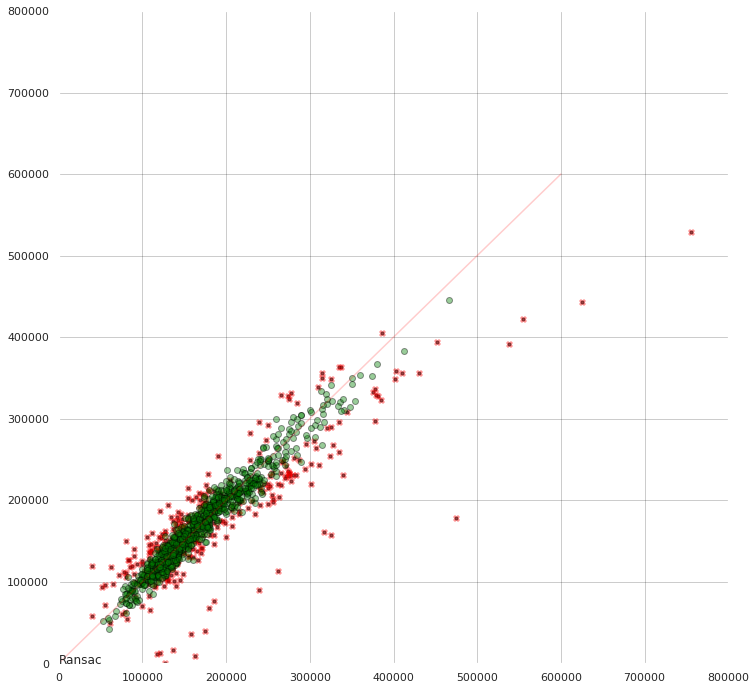

In [652]:
ransacreg = linear_model.RANSACRegressor()
ransacreg.fit(X, Y)
inlier_mask = ransacreg.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
ransacpred=ransacreg.predict(X)
plt.figure(figsize=(12,12))


plt.subplot(111, facecolor="white",)
plt.grid(color="black", alpha=0.2)
plt.plot([0,600000],[0,600000],c="red", alpha=0.2)

plt.scatter(Y[outlier_mask],ransacpred[:][outlier_mask],c="black",alpha=0.6,marker=".",)
plt.scatter(Y[outlier_mask],ransacpred[:][outlier_mask],c="red",alpha=0.3,marker="X")
plt.scatter(Y[inlier_mask],ransacpred[:][inlier_mask],c="green",alpha=0.4,marker="o",edgecolors="black")
#plt.scatter(df["Id"][inlier_mask],df["SalePrice"][inlier_mask],c="green",alpha=0.9,marker="o")
#plt.scatter(df["Id"],ransacpred[:],c="red",alpha=0.9,marker=".")

plt.text(0,0,"Ransac")
plt.xlim(0,800000)
plt.ylim(0,800000)

print(len(ransacpred))
plt.show()

In [653]:
outlierDB=sum(outlier_mask)
inlierDB=sum(inlier_mask)
independentDB=len(X.columns)
print(list(X.head()))

print(f"\nA összes mintából ({outlierDB+inlierDB}) RANSAC módszer alapján az outlierek száma: {outlierDB}. \n ")
print(f"Független változók száma: {independentDB}")
print(pd.DataFrame(ransacpred,columns=["Ransac Predictor"]).describe(),"\n\n\n",Y.describe())


['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', '1stFlrSF', 'GarageArea', 'FullBath', 'TotRmsAbvGrd', 'ExterQual_Gd', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 'Foundation_PConc', 'MasVnrArea', 'KitchenQual_Ex', 'BsmtQual_Ex', 'HeatingQC_Ex', 'BsmtFinSF1', 'NoRidge', 'GarageFinish_Fin', 'KitchenQual_Gd', 'ExterQual_Ex', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF', 'BsmtQual_Gd', 'NridgHt', 'HalfBath', 'LotFrontage', 'GarageYrBlt', 'LotArea', 'FireplaceQu_Gd', 'MSZoning_RL', 'CentralAir_Y', 'FireplaceQu_Ex', 'GarageQual_TA', 'FireplaceQu_TA', 'BsmtFullBath', 'BedroomAbvGr', 'KitchenQual_Ta', 'BsmtQual_TA', 'GarageFinish_Unf', 'Foundation_CBlock', 'MSZoning_RM', 'HeatingQC_TA', 'CentralAir_N', 'Foundation_BrkTil', 'Edwards', 'NAmes', 'OldTown', 'KitchenQual_Fa', 'BrkSide', 'IDOTRR', 'KitchenAbvGr', 'BsmtCond_Fa', 'ExterCond_FA', 'Foundation_Slab', 'Sawyer', 'HeatingQC_FA', 'ExterQual_Fa', 'HeatingQC_Gd', 'GarageQual_Fa', 'MeadowV', 'BsmtQual_Fa', 'EnclosedPorch', 'BrDale', 'Heatin

# Ransacot kielemeztük 

# Nézzünk egy LASSO-t

In [654]:
from sklearn.linear_model import Lasso
alpha=0.01
lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e6)
lassoreg.fit(X,Y)
lassopred = lassoreg.predict(X)


1198


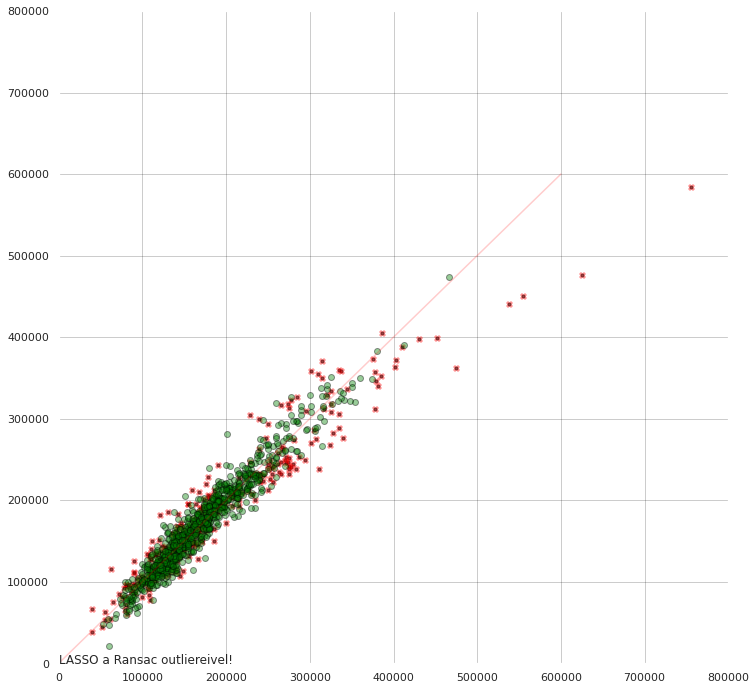

In [655]:
plt.figure(figsize=(12,12))


plt.subplot(111, facecolor="white",)
plt.grid(color="black", alpha=0.2)
plt.plot([0,600000],[0,600000],c="red", alpha=0.2)

plt.scatter(Y[outlier_mask],lassopred[:][outlier_mask],c="black",alpha=0.6,marker=".",)
plt.scatter(Y[outlier_mask],lassopred[:][outlier_mask],c="red",alpha=0.3,marker="X")
plt.scatter(Y[inlier_mask],lassopred[:][inlier_mask],c="green",alpha=0.4,marker="o",edgecolors="black")
#plt.scatter(df["Id"][inlier_mask],df["SalePrice"][inlier_mask],c="green",alpha=0.9,marker="o")
#plt.scatter(df["Id"],ransacpred[:],c="red",alpha=0.9,marker=".")

plt.text(0,0,"LASSO a Ransac outliereivel!")
plt.xlim(0,800000)
plt.ylim(0,800000)
plt

print(len(lassopred))
plt.show()

# **Nézzük mi van ha csak a fél adathalmazra tanítjuk**



---



In [656]:
divnum = 0.7 #@param {type:"slider", min:0, max:1, step:0.1}


In [657]:
#divnum=0.7
Ysize=len(Y)
divider=int(Ysize*divnum)
Y1=Y[0:divider]
Y2=Y[divider:]
X1=X[0:divider]
X2=X[divider:]


In [658]:
from sklearn.linear_model import Lasso
alpha=0.003
lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e6)
lassoreg.fit(X1,Y1)
lassopredY1 = lassoreg.predict(X1)
lassopredY2 = lassoreg.predict(X2)


In [659]:
a=f"Tanítási minta: {len(Y1)} db. Visszateszt: {len(Y2)} db! "
print(a)

Tanítási minta: 838 db. Visszateszt: 360 db! 


838


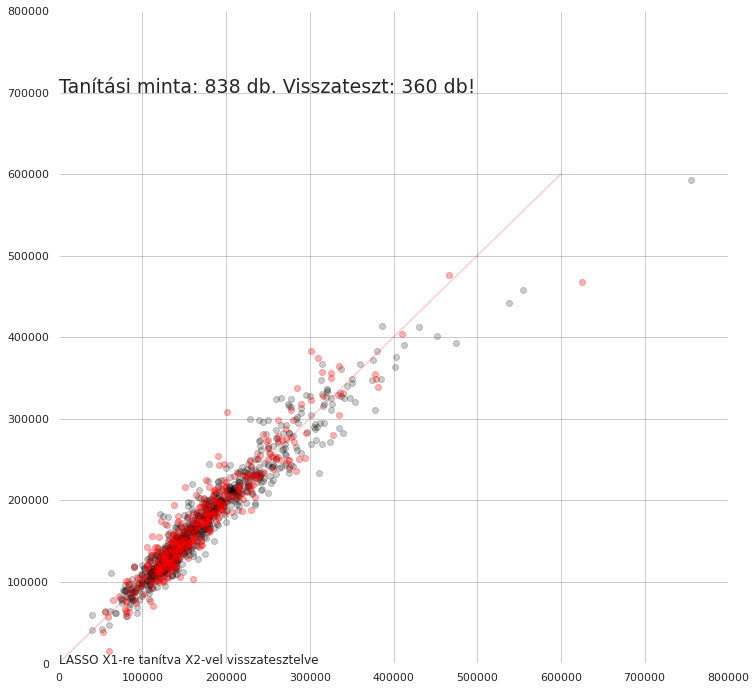

In [660]:
plt.figure(figsize=(12,12))


plt.subplot(111, facecolor="white",)
plt.grid(color="black", alpha=0.2)
plt.plot([0,600000],[0,600000],c="red", alpha=0.2)

plt.scatter(Y1,lassopredY1[:],c="black",alpha=0.2,marker="o",)
plt.scatter(Y2,lassopredY2[:],c="red",alpha=0.3,marker="o")
#plt.scatter(Y[inlier_mask],lassopred[:][inlier_mask],c="green",alpha=0.4,marker="o",edgecolors="black")
#plt.scatter(df["Id"][inlier_mask],df["SalePrice"][inlier_mask],c="green",alpha=0.9,marker="o")
#plt.scatter(df["Id"],ransacpred[:],c="red",alpha=0.9,marker=".")

plt.text(0,0,"LASSO X1-re tanítva X2-vel visszatesztelve")
plt.text(0,700000,a,fontsize=19)

plt.xlim(0,800000)
plt.ylim(0,800000)


print(len(lassopredY1))
plt.show()

In [661]:
Y2.describe()

,SalePrice
count,360.000000
mean,173462.805556
std,67837.696713
min,52500.000000
25%,129000.000000
50%,160000.000000
75%,197900.000000
max,625000.000000


In [662]:
len(lassopredY2)

360

In [663]:
len(lassoreg.coef_)

78

In [664]:
X.columns

Index(['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', '1stFlrSF',
       'GarageArea', 'FullBath', 'TotRmsAbvGrd', 'ExterQual_Gd', 'YearBuilt',
       'YearRemodAdd', 'Fireplaces', 'Foundation_PConc', 'MasVnrArea',
       'KitchenQual_Ex', 'BsmtQual_Ex', 'HeatingQC_Ex', 'BsmtFinSF1',
       'NoRidge', 'GarageFinish_Fin', 'KitchenQual_Gd', 'ExterQual_Ex',
       '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF', 'BsmtQual_Gd', 'NridgHt',
       'HalfBath', 'LotFrontage', 'GarageYrBlt', 'LotArea', 'FireplaceQu_Gd',
       'MSZoning_RL', 'CentralAir_Y', 'FireplaceQu_Ex', 'GarageQual_TA',
       'FireplaceQu_TA', 'BsmtFullBath', 'BedroomAbvGr', 'KitchenQual_Ta',
       'BsmtQual_TA', 'GarageFinish_Unf', 'Foundation_CBlock', 'MSZoning_RM',
       'HeatingQC_TA', 'CentralAir_N', 'Foundation_BrkTil', 'Edwards', 'NAmes',
       'OldTown', 'KitchenQual_Fa', 'BrkSide', 'IDOTRR', 'KitchenAbvGr',
       'BsmtCond_Fa', 'ExterCond_FA', 'Foundation_Slab', 'Sawyer',
       'HeatingQC_FA', 'ExterQual_F

[-57681.75421083866, -26711.105318890346, -25494.6969281832, -25086.73719175317, -24259.14300316745, -22810.018258288535, -22774.838038519832, -21444.910430142696, -20917.04768025146, -19173.105828847358, -18891.234351079886, -15851.246457966623, -15427.343868476422, -14327.45501234414, -12396.852399242338, -11579.251473295664, -10459.105745059996, -9222.318994283574, -8682.395070720002, -8544.213250566225, -8039.658698423768, -6478.004862235344, -5880.48988371437, -5701.12095692272, -5066.513266134816, -3673.941172462781, -2427.604305832361, -2413.6314607322965, -2172.512646407829, -2017.0231546643404, -1642.1945526948416, -738.3996136765594, -737.8623233939559, -126.4334736426336, -88.49499874491653, -6.0940760963493945, -2.013602919666016, 0.0, 0.5322916601055827, 1.2907134289158617, 1.5833856012947867, 4.769322479409826, 8.578563392337754, 9.7026352444223, 11.950541521773843, 15.777922779966786, 17.34756832441467, 17.40395301141997, 22.482277046421704, 68.07828374556857, 90.9823581

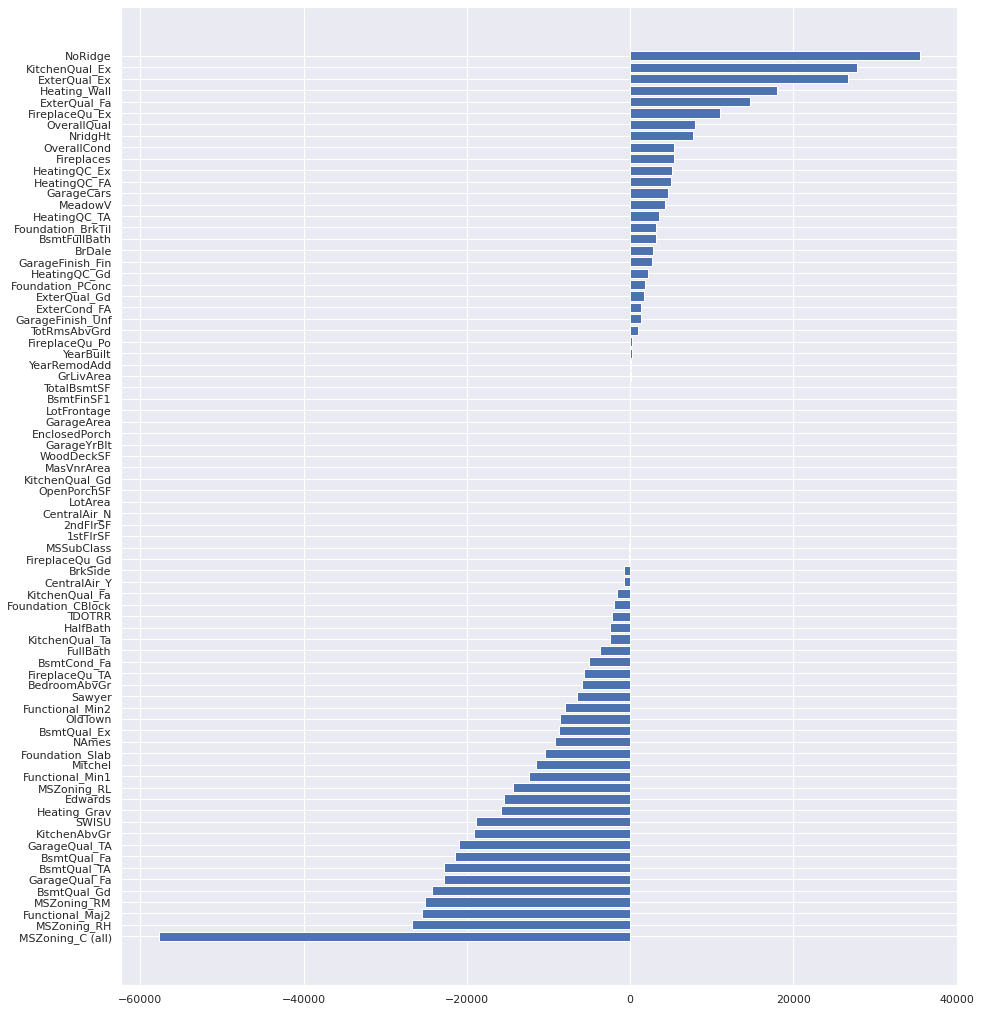

In [665]:
SX=X.columns
SY=lassoreg.coef_
ziped=zip(SY,SX)
SortedXY=sorted(ziped,reverse=False)
#print(SortedXY)
SX,SY=list(zip(*SortedXY))
SX=list(SX)
print(SX)
SY=list(SY)
plt.figure(figsize=(15,18))
#plt.barh(X.columns[0:90],lassoreg.coef_[0:90],)
plt.barh(SY,SX)


plt.show()